In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [231]:
data = pd.read_csv('train.csv')

In [232]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [234]:
data_train.shape

(785, 41000)

In [235]:
Y_train

array([3, 7, 4, ..., 1, 1, 6], dtype=int64)

In [236]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [237]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def compute_loss(A2, Y):
    one_hot_Y = one_hot(Y)
    return -np.mean(np.sum(one_hot_Y * np.log(A2 + 1e-10), axis=0))

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    
    # Lists to store metrics for visualization
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    for i in range(iterations):
        # Forward and backward pass
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        # Compute metrics every 10 iterations
        if i % 10 == 0:
            # Training metrics
            train_loss = compute_loss(A2, Y)
            train_predictions = get_predictions(A2)
            train_accuracy = get_accuracy(train_predictions, Y)
            
            # Validation metrics
            _, _, _, A2_cv = forward_prop(W1, b1, W2, b2, X_dev)
            val_loss = compute_loss(A2_cv, Y_dev)
            val_predictions = get_predictions(A2_cv)
            val_accuracy = get_accuracy(val_predictions, Y_dev)
            
            # Store metrics
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)
            
            print(f"Iteration: {i}")
            print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}\n")
    
    return W1, b1, W2, b2, train_losses, train_accuracies, val_losses, val_accuracies

In [238]:
W1, b1, W2, b2, train_losses, train_accuracies, val_losses, val_accuracies = gradient_descent(X_train, Y_train, 0.20, 1200)

[7 2 7 ... 7 7 7] [3 7 4 ... 1 1 6]
[7 3 7 7 6 2 3 2 2 7 3 3 9 3 3 7 7 7 7 7 2 9 6 2 7 4 2 2 2 3 3 7 3 7 1 4 2
 2 2 2 3 2 4 2 4 7 7 2 3 5 2 5 2 2 4 7 7 7 4 3 4 7 6 2 2 7 4 6 6 7 7 7 3 3
 4 7 3 5 3 2 3 6 6 3 2 2 4 6 7 3 7 2 1 2 3 7 3 3 2 4 2 7 7 7 4 2 7 3 7 2 6
 7 3 7 6 2 3 4 3 4 3 3 3 9 5 6 5 4 2 3 1 3 2 2 4 6 3 7 2 3 3 2 4 3 3 4 6 4
 9 7 6 2 4 6 7 4 6 7 7 6 2 7 7 2 2 2 7 2 5 4 7 6 2 3 7 2 3 3 2 2 3 1 5 4 3
 3 9 4 3 7 2 3 3 3 2 7 4 5 2 2 7 4 2 3 7 9 2 6 7 7 3 7 4 7 9 6 4 2 2 4 5 3
 5 4 7 7 7 3 2 2 7 7 4 4 7 6 3 7 4 6 2 7 6 6 3 7 5 7 7 7 5 3 5 2 3 7 7 2 7
 7 4 7 7 4 2 5 2 7 3 6 5 7 5 2 7 2 7 3 4 3 3 3 2 3 4 2 7 2 2 5 5 3 2 3 4 3
 2 3 2 2 2 7 4 2 5 7 7 2 6 2 3 3 7 2 6 2 3 7 2 7 7 3 4 7 2 2 3 1 3 2 2 2 4
 2 3 7 7 3 4 2 7 5 2 3 3 3 2 4 7 7 6 7 7 2 2 7 7 2 2 6 6 3 2 7 7 3 2 4 3 6
 5 2 4 3 2 7 7 7 6 4 2 6 2 6 7 3 9 9 3 3 2 9 6 7 7 3 6 7 2 4 3 4 2 4 7 2 3
 6 3 3 7 7 7 4 4 7 7 3 6 7 2 3 7 7 3 4 7 4 4 3 3 4 2 1 7 7 2 7 9 3 7 7 3 2
 6 6 3 7 3 2 7 9 2 2 5 3 6 7 7 4 6 3 6 3 2 7 2 6 6 2 6 4 7 7 3 7

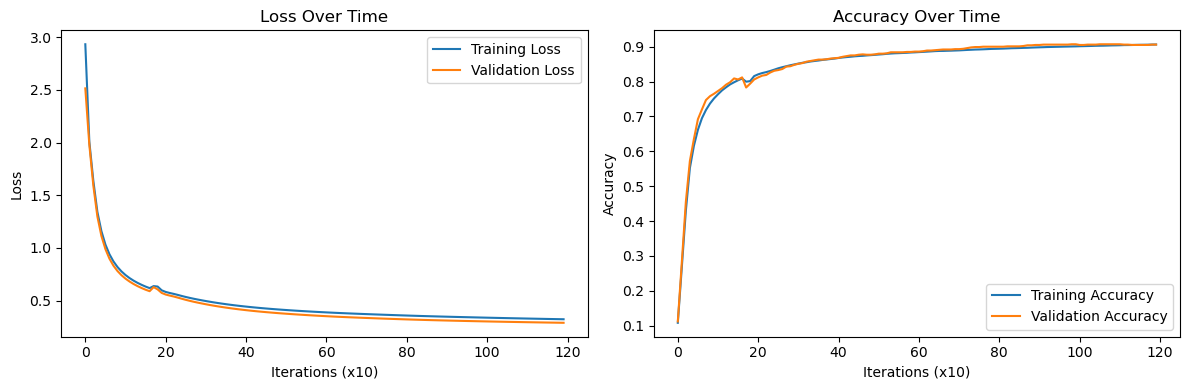

In [239]:
# Plot training curves
plt.figure(figsize=(12, 4))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Time')
plt.xlabel('Iterations (x10)')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Time')
plt.xlabel('Iterations (x10)')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [240]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


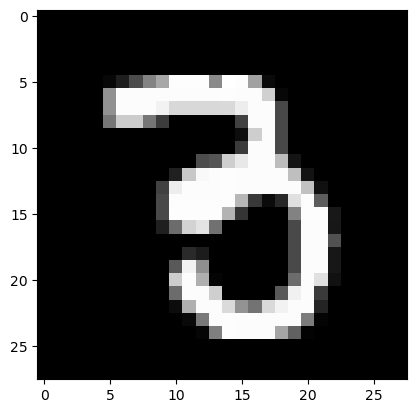

Prediction:  [7]
Label:  7


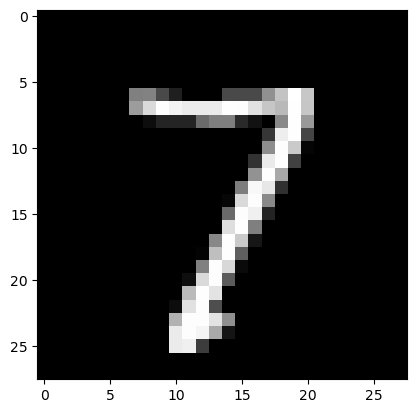

Prediction:  [4]
Label:  4


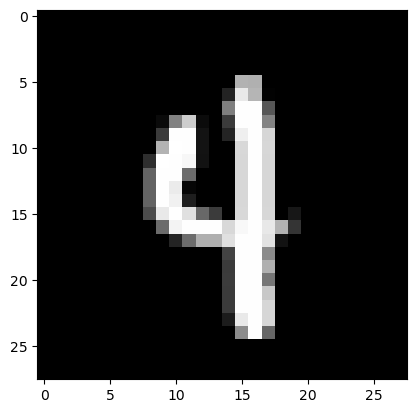

Prediction:  [0]
Label:  0


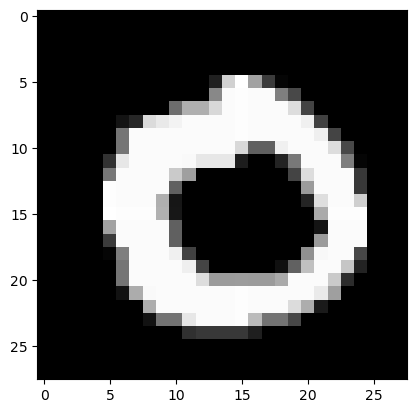

In [241]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Testing prediction on our cross validation set

In [242]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 9 3 9 6 1 4 1 7 5 1 4 9 3 2 6 0 0 5 6 5 6 0 5 6 4 6 8 0 9 2 6 0 1 9 5 9
 1 1 7 9 1 9 1 3 0 3 5 0 6 2 6 6 4 1 7 4 5 1 3 9 6 0 7 9 2 9 0 7 9 6 1 6 3
 6 9 2 6 4 8 9 8 4 0 1 8 4 8 7 0 2 1 2 8 2 6 3 0 5 1 1 6 6 5 0 0 2 2 7 7 0
 6 7 3 1 8 3 5 4 9 2 2 9 8 0 0 0 5 1 3 9 8 8 2 4 7 5 0 0 4 0 9 5 2 5 5 4 4
 9 3 7 1 3 5 9 2 2 4 4 5 6 4 1 8 7 8 7 8 6 9 2 5 8 3 8 1 2 8 8 8 7 7 0 9 0
 5 9 4 3 0 9 3 4 2 2 9 7 6 8 9 6 5 7 5 0 6 1 0 7 0 4 6 7 5 2 8 1 7 1 2 6 7
 0 7 2 9 2 2 8 1 6 0 9 3 3 4 3 7 5 2 4 3 0 7 8 0 6 8 5 3 5 4 0 6 6 7 4 5 3
 3 9 3 1 8 9 6 1 2 3 0 6 7 6 4 6 1 8 3 9 2 3 9 5 2 9 2 6 7 1 2 0 2 8 4 5 3
 6 2 4 8 6 6 4 7 7 4 0 9 2 1 3 8 6 1 3 1 2 9 1 5 0 5 6 7 4 0 2 7 0 8 8 3 3
 6 2 0 5 2 3 8 6 0 1 3 5 2 7 1 0 0 7 1 2 8 7 6 6 9 9 3 7 4 0 6 5 0 7 9 2 0
 5 7 7 9 0 5 4 3 0 1 5 4 8 9 5 5 4 8 3 9 8 8 1 0 6 3 7 6 8 3 5 1 2 3 5 7 7
 2 4 0 1 7 2 7 1 0 1 0 3 9 7 3 4 2 9 4 3 4 4 4 3 7 1 7 4 5 4 6 8 9 1 6 4 7
 3 9 6 6 4 1 2 6 9 1 6 3 3 4 0 7 0 3 8 2 8 2 1 7 2 5 8 3 4 3 7 2 0 4 6 9 2
 7 1 4 2 4 5 5 4 7 7 9 5 

0.907